In [1]:
import utils
import gaussian_cal
import pandas as pd
import subprocess
import os
import time
from rdkit.Chem import PandasTools
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
import pandas as pd
df = pd.read_csv('similarity.csv')
# column_data = df['column_name']  # 将 'column_name' 替换为你想要读取的列的名称
name_list=list(df[' cid'])
name_list = ['A' + str(i) for i in name_list]
smiles_list=list(df['canonicalsmiles'])


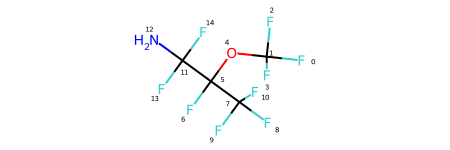

In [37]:
FFKM = 'FC(F)(F)OC(F)(C(F)(F)F)C(N)(F)(F)'
ffkm_mol =Chem.MolFromSmiles(FFKM)
for atom in ffkm_mol.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
ffkm_mol

In [56]:
base = smiles_list[92]
FFKM = 'FC(F)(F)OC(F)(C(F)(F)F)C(F)(F)'
def crosslink_reaction(base,FFKM):
    mol = Chem.MolFromSmiles(base)
    patt = Chem.MolFromSmarts('[C;!R]C=[C;!R]')
    repl = Chem.MolFromSmiles(FFKM)
    rms = AllChem.ReplaceSubstructs(mol, patt, repl, replaceAll=True, replacementConnectionPoint=11)
    s1 = Chem.MolToSmiles(rms[0])
    # s1=s1.replace('O=C1C', 'O=C1N',1)
    return s1
s1=crosslink_reaction(base,FFKM)
s1

'CN(C(=O)N(C)C(=O)(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)(F)(F)C(F)(OC(F)(F)F)C(F)(F)F.FC(F)C(F)(OC(F)(F)F)C(F)(F)F.FC(F)C(F)(OC(F)(F)F)C(F)(F)F'

In [84]:
def filter_specific_functional_group(smiles,sub):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(sub)
    matches = mol.GetSubstructMatches(patt)
    if matches:
        return True
    else:
        return False
    
OH_smiles,amide_smiles,no_amide = [],[],[]
OH_cid,amide_cid,no_amide_cid = [],[],[]
for i in tqdm(range(len(smiles_final))):
    if filter_specific_functional_group(smiles_final[i], '[OH]'):
        OH_smiles.append(smiles_final[i])
        OH_cid.append(cid_final[i])

    else:
        continue
for i in tqdm(range(len(smiles_final))):
    if filter_specific_functional_group(smiles_final[i], 'C(=O)N'):
        amide_smiles.append(smiles_final[i])
        amide_cid.append(cid_final[i])
    else:
        no_amide.append(smiles_final[i])
        no_amide_cid.append(cid_final[i])
        continue



100%|██████████| 2446/2446 [00:00<00:00, 4299.89it/s]


In [92]:
print(len(OH_smiles))
print(len(amide_smiles))
no_amide
# OH_smiles

260
1581


['O=c1n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'O=c1[nH]c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'CCCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O',
 'Cc1cn(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c1=O',
 'Cc1cc(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'Cn1cnc2c1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n2C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'O=c1c2[nH]cnc2n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'COc1ccc(C=Cc2nc3c([nH]2)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n3C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)cc1OC',
 'COc1cc(C=Cc2nc3c([nH]2)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n3C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)cc(OC)c1OC',
 'Nc1cc(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n1C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F',
 'COc1cc(C=Cc2nc3c(c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F

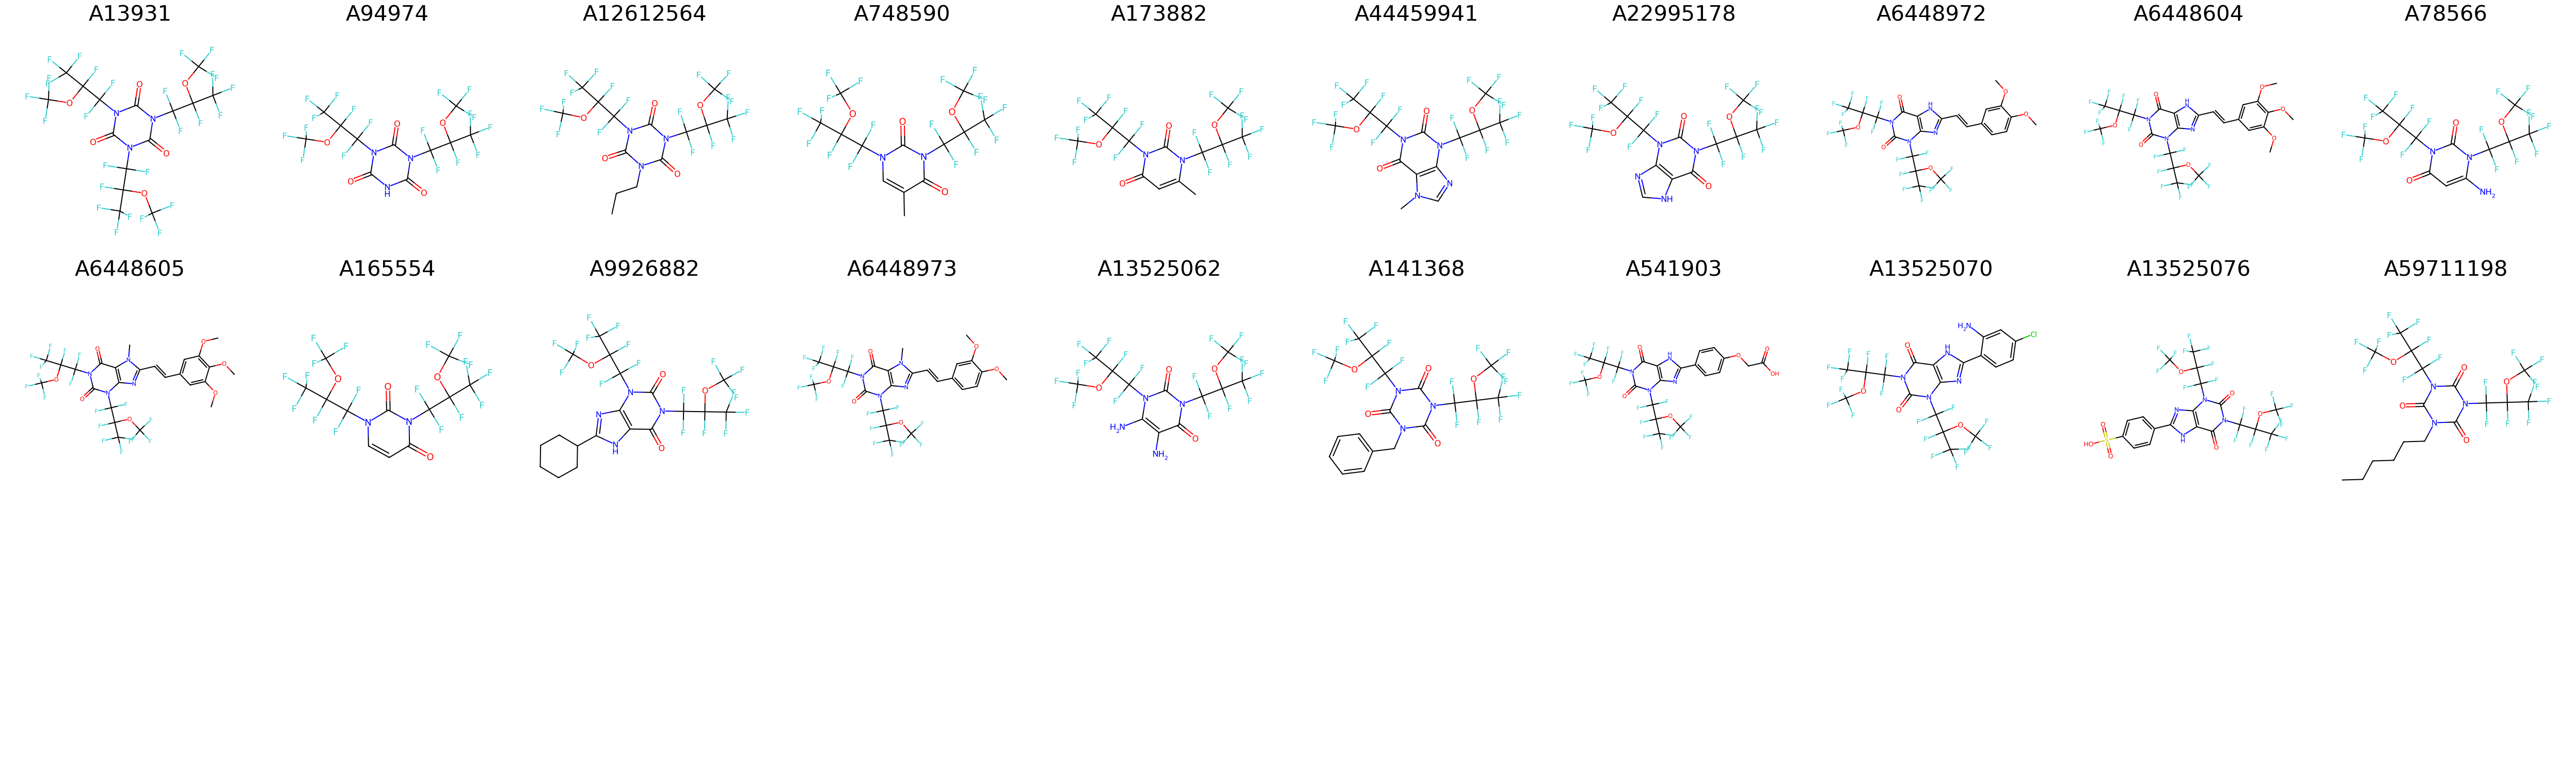

In [88]:
# multiplot(OH_smiles[1:10],OH_cid[1:10],'OH')
multiplot(no_amide[0:20],no_amide_cid[0:20],'no_amide')


In [27]:
for i in tqdm(range(xxx,xxx)):
    try:
        os.system('scancel '+str(i))
    except:
        continue

100%|█████████▉| 982/986 [00:40<00:00, 29.79it/s]scancel: error: Kill job error on job id 1804206: Access/permission denied
scancel: error: Kill job error on job id 1804207: Access/permission denied
100%|██████████| 986/986 [00:40<00:00, 24.45it/s]


In [52]:
def crosslink_reaction(base,FFKM):
    mol = Chem.MolFromSmiles(base)
    patt = Chem.MolFromSmarts('[C;!R]C=[C;!R]')
    repl = Chem.MolFromSmiles(FFKM)
    rms = AllChem.ReplaceSubstructs(mol, patt, repl, replaceAll=True, replacementConnectionPoint=11)
    s1 = Chem.MolToSmiles(rms[0])
    # s1=s1.replace('O=C1C', 'O=C1N',1)
    return s1
FFKM = 'FC(F)(F)OC(F)(C(F)(F)F)C(F)(F)'
crosslinked_smiles_list = []
count = 0
for _ in smiles_list:
    crosslinked_smiles_list.append(crosslink_reaction(_,FFKM))
smiles_filter,cids_filter = [],[]
for i in range(len(crosslinked_smiles_list)):
    if "." in crosslinked_smiles_list[i]:
        continue
    else:
        try :
            # mol = Chem.MolFromSmiles(crosslinked_smiles_list[i])
            smiles_filter.append(crosslinked_smiles_list[i])
            cids_filter.append(name_list[i])
            count += 1
        except:
            continue
print(count)


[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not r

2568


[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors
[15:56:23] WARNING: not removing hydrogen atom without neighbors


In [53]:
len(smiles_filter)

2568

In [17]:
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
def multiplot(smiles_list, cids, name):
    # 创建一个10x10的子图布局
    num_rows = len(smiles_list) // 10 + 1
    num_cols = 10
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*5))

    # 遍历SMILES表达式并在子图中显示
    for i, smiles in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            ax = axs[i // num_cols, i % num_cols]
            img = Draw.MolToImage(mol, size=(450, 450))
            ax.imshow(img)
            ax.axis('off')  # 关闭坐标轴
            ax.set_title(f"{cids[i]}", fontsize=30)  # 添加子图标题
    # for i in range(20, num_rows * num_cols):
    for i in range(len(smiles_list), num_rows * num_cols):
        axs.flatten()[i].axis('off')
    # 调整子图布局
    plt.tight_layout()
    plt.savefig(name,dpi=300,format='pdf')

# multiplot(smiles, cids_filter, 'crosslinked.pdf')


In [25]:
crosslinked_smiles_list[99]

'Clc1ccc(Cl)c(-c2ccco2)c1.O=C(NC(=O)(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)N(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)C(=O)(F)(F)C(F)(OC(F)(F)F)C(F)(F)F'

[15:59:55] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:00:03] Explicit valence for atom # 23 C, 5, is greater than permitted
[16:00:03] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:00:04] Explicit valence for atom # 29 C, 6, is greater than permitted
[16:00:04] Explicit valence for atom # 6 C, 6, is greater than permitted
[16:00:04] Explicit valence for atom # 3 C, 6, is greater than permitted


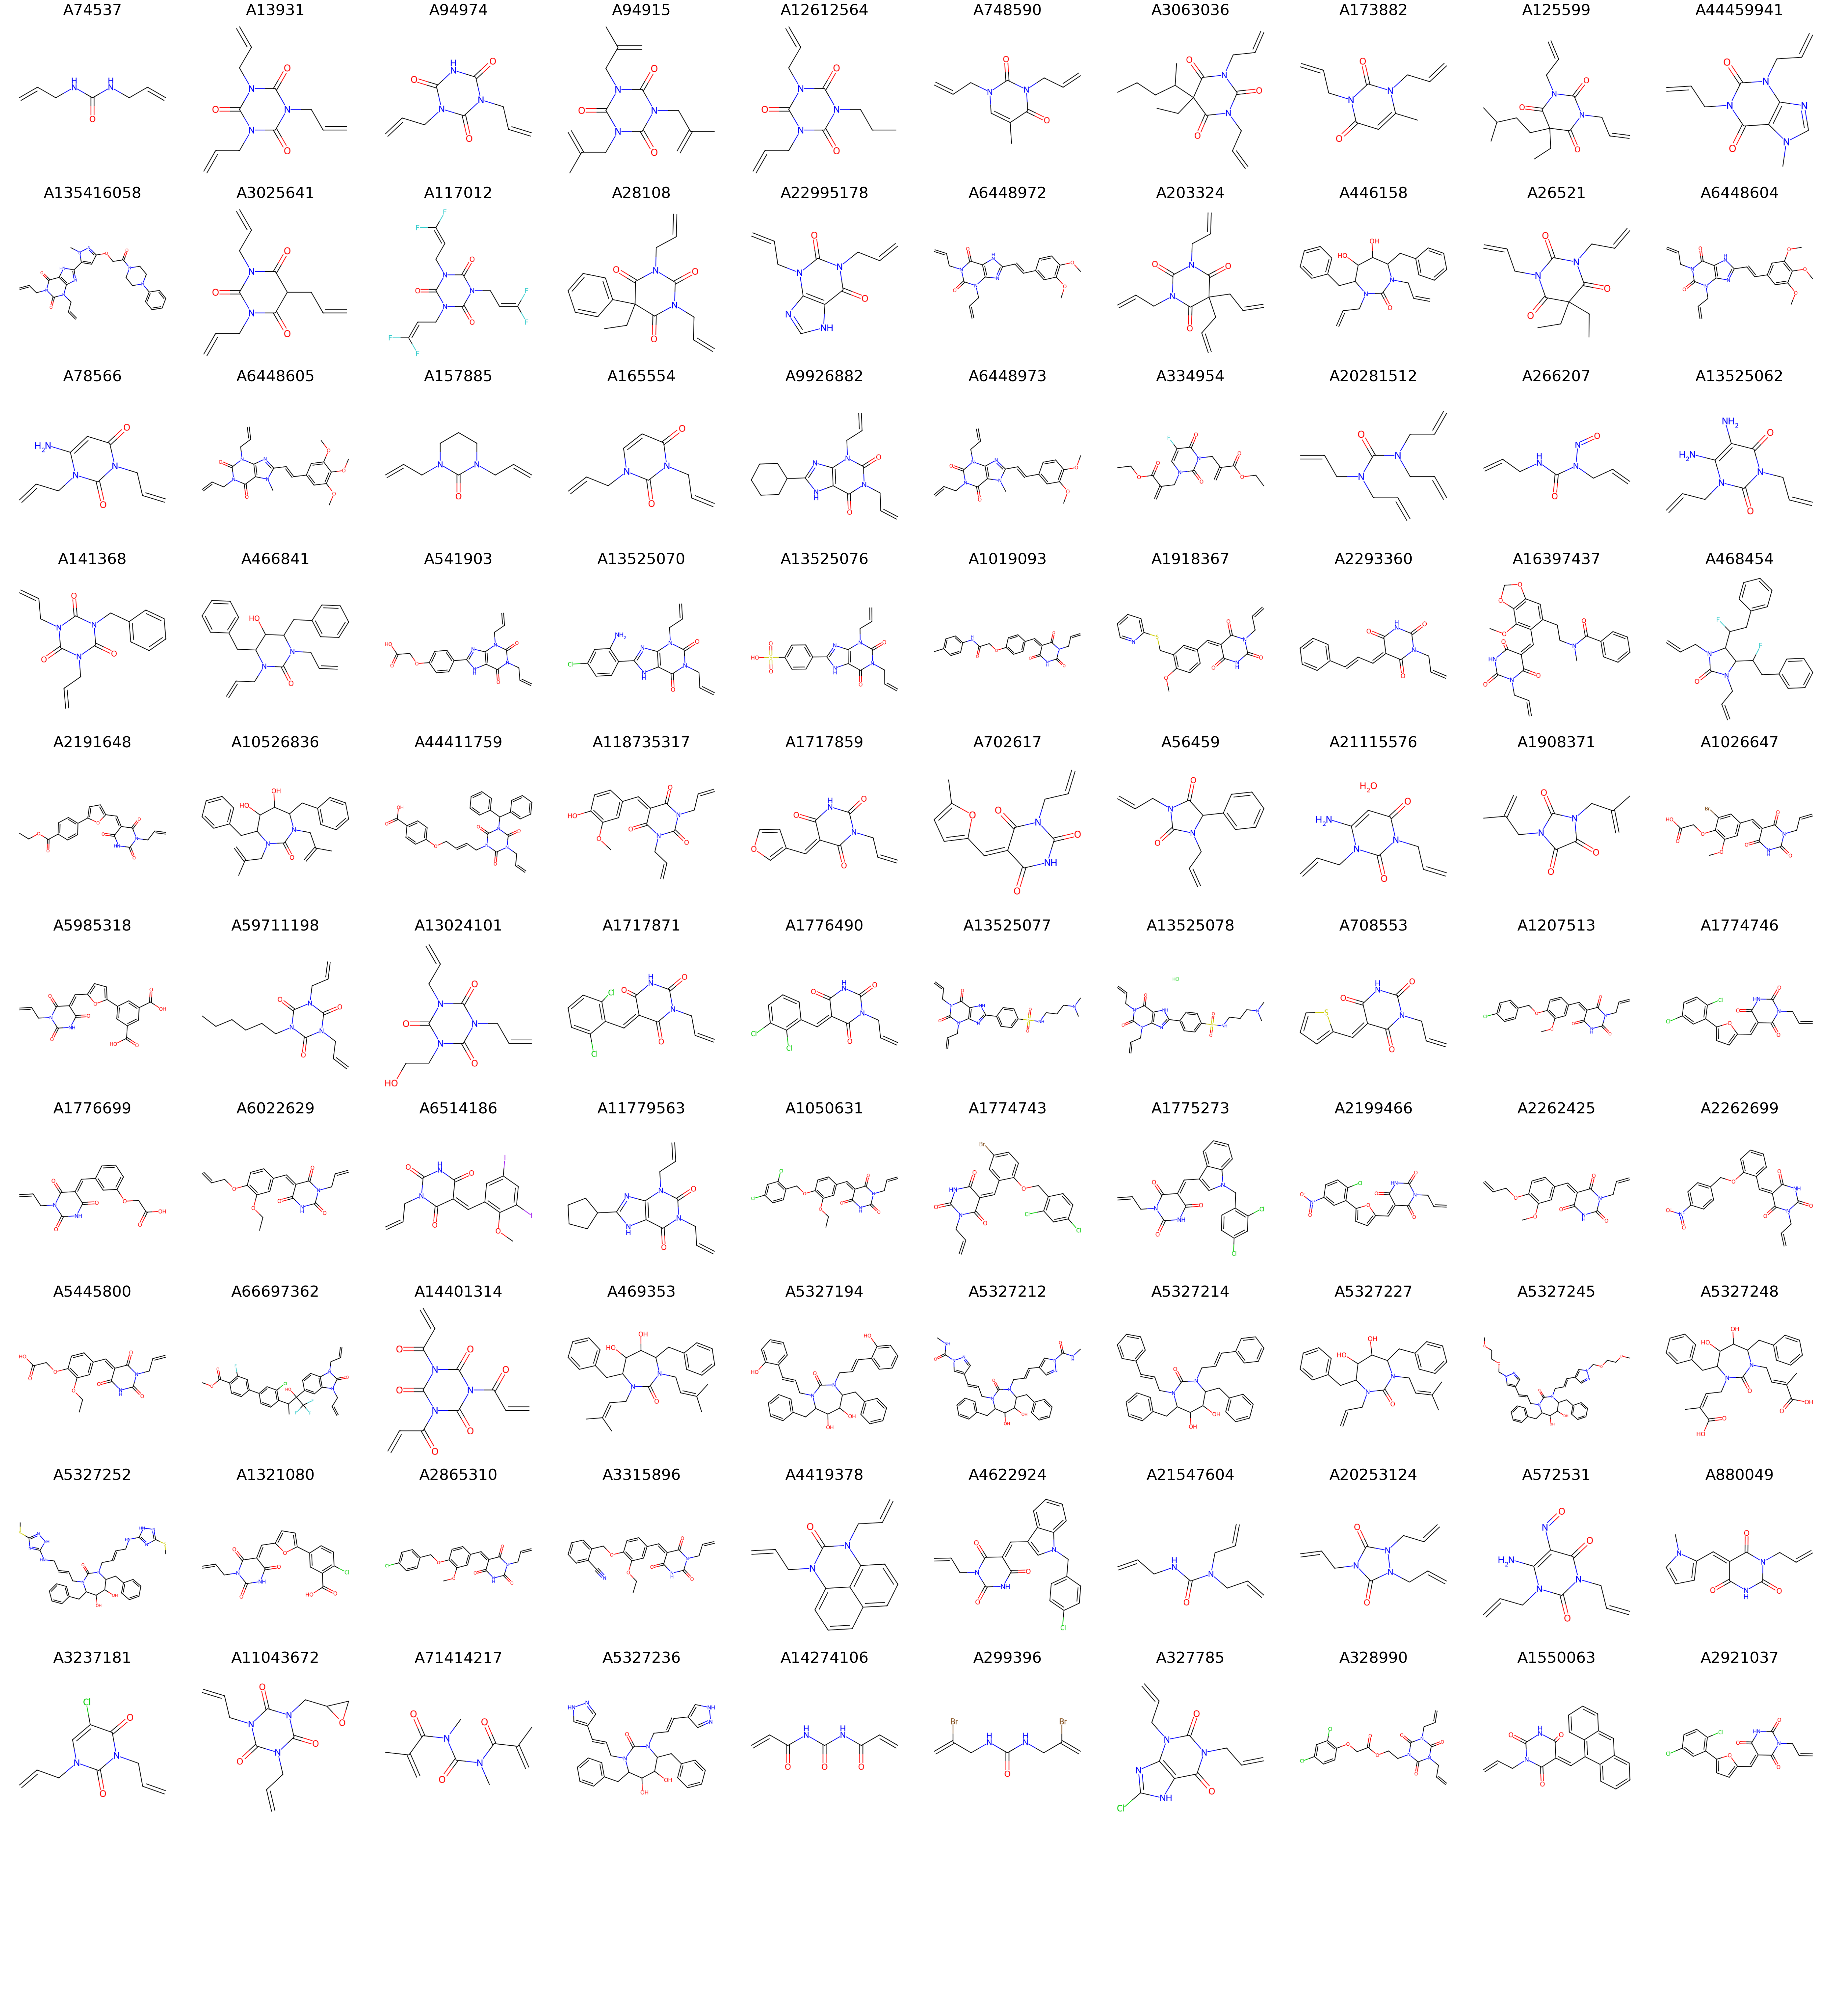

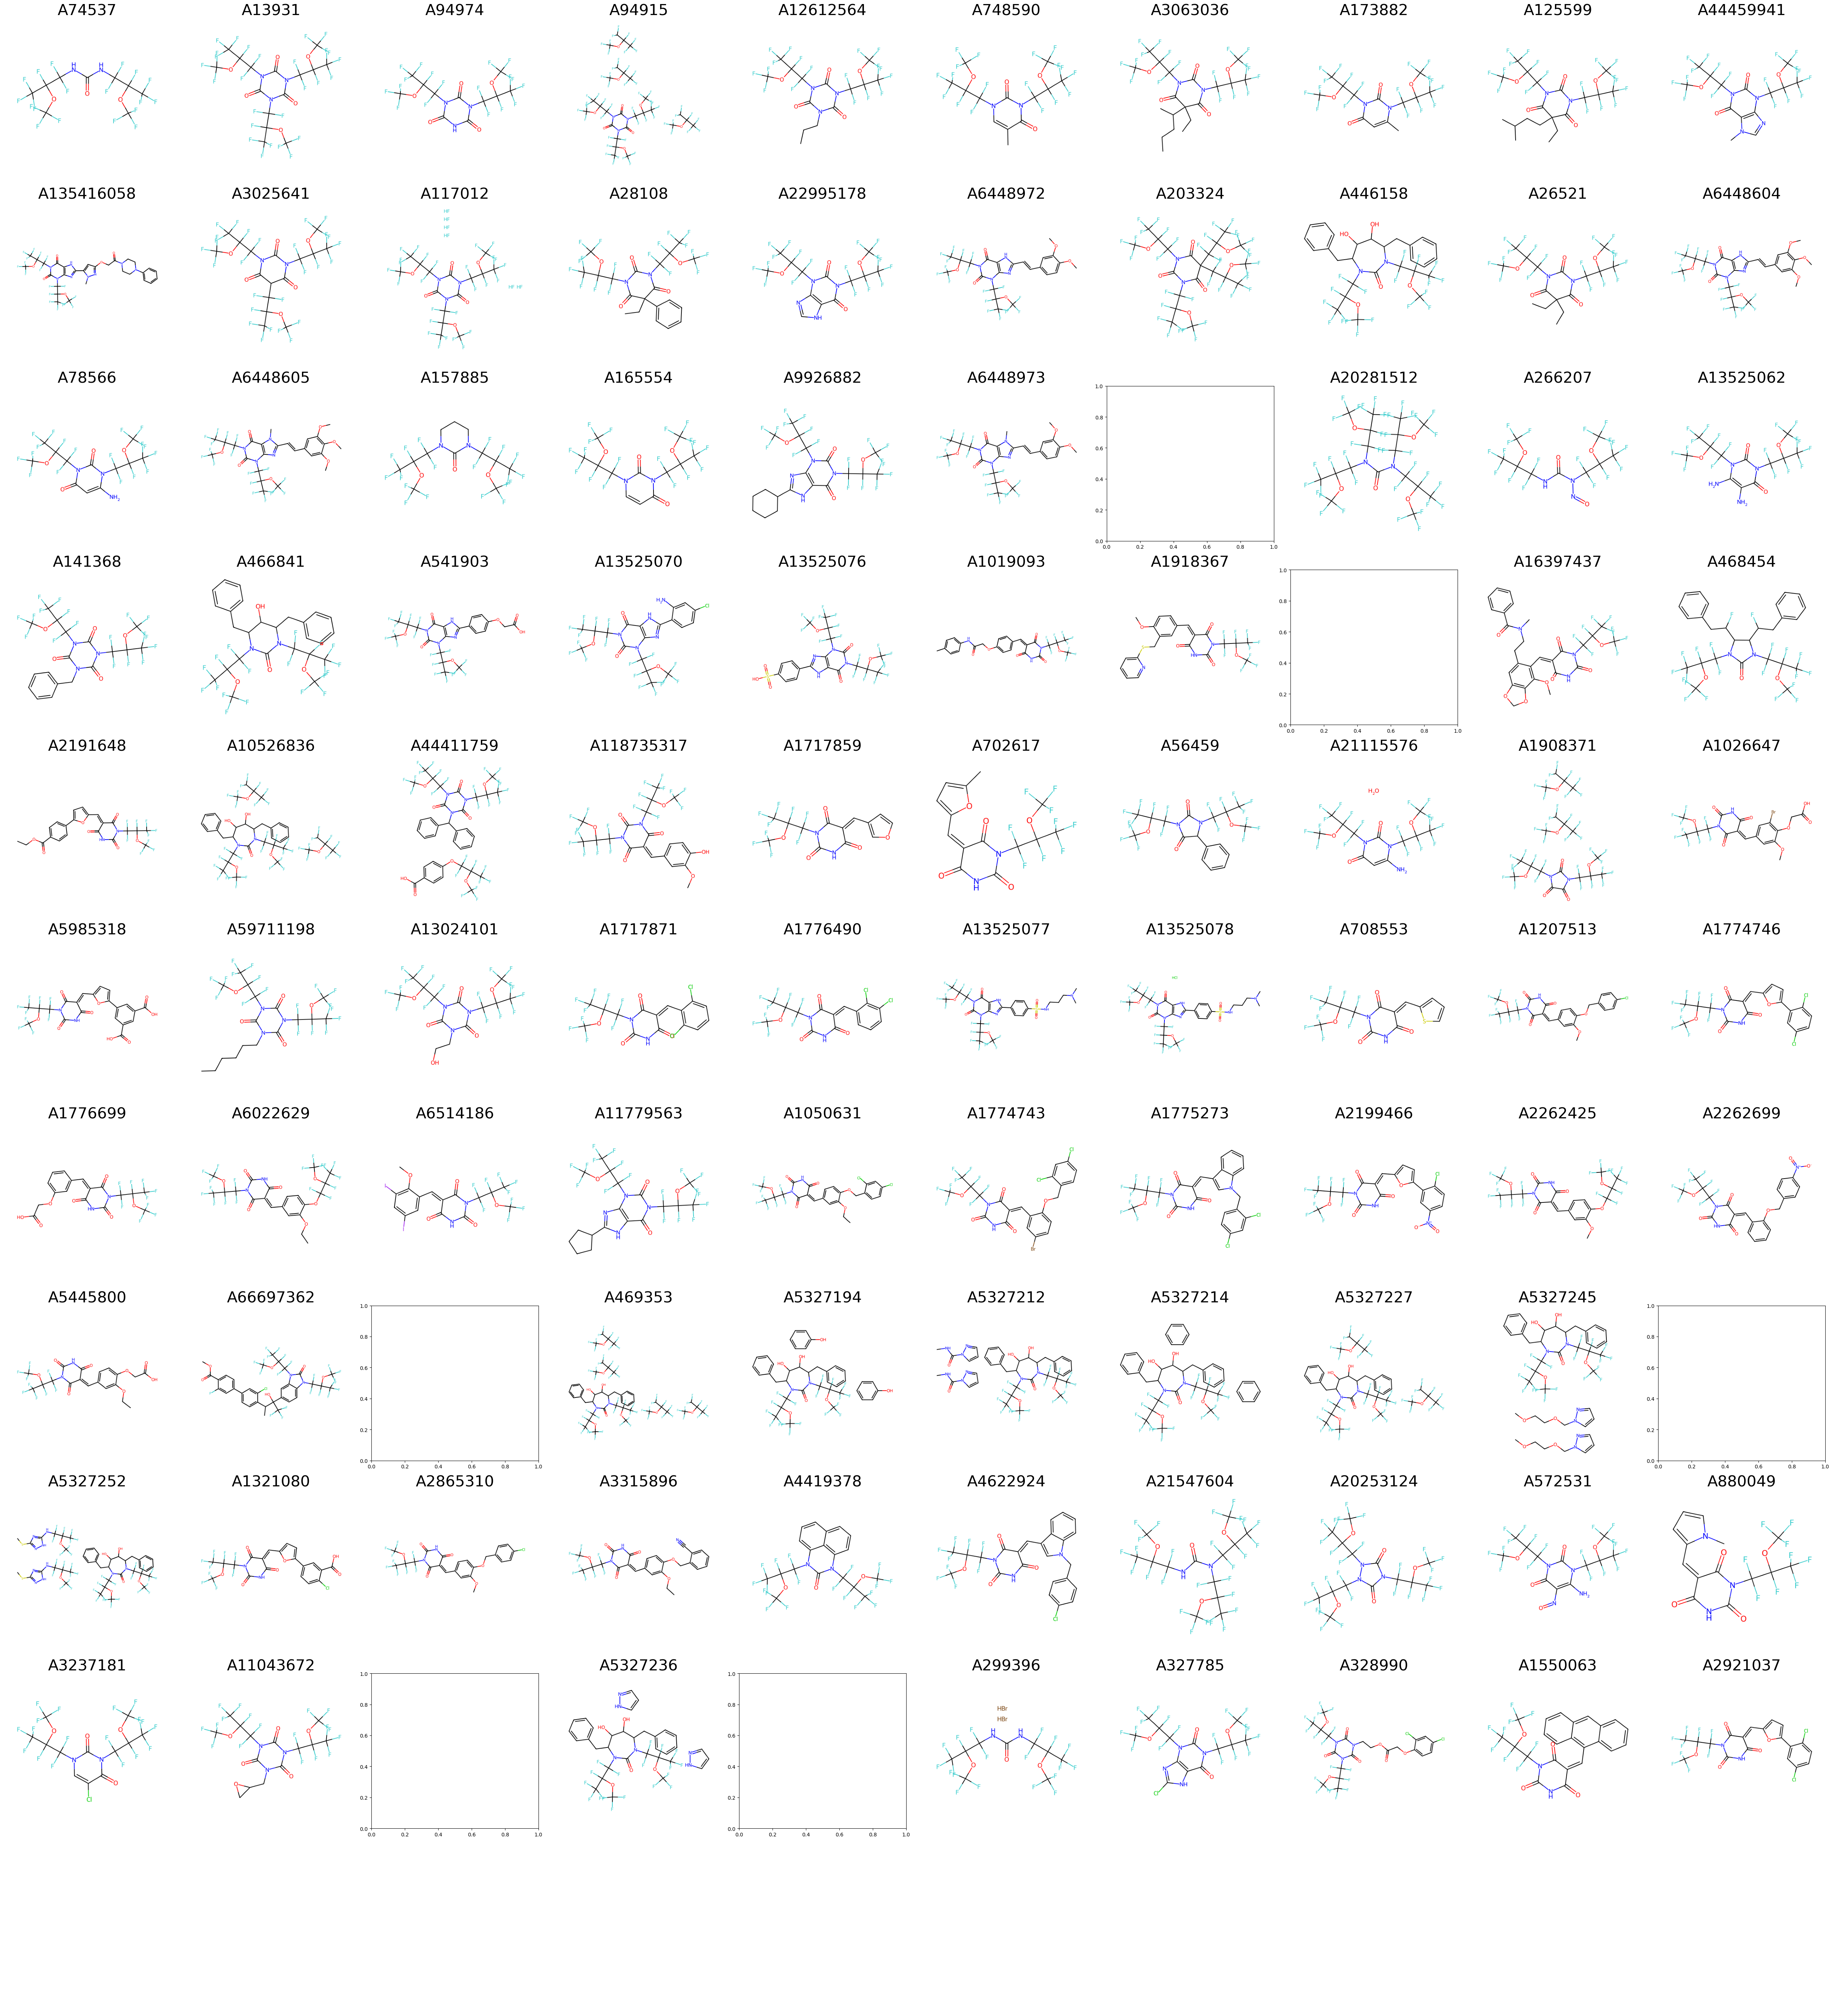

In [54]:
multiplot(smiles_list[0:100],name_list[0:100] ,'test_base.pdf')
multiplot(crosslinked_smiles_list[0:100],name_list[0:100] ,'test_crosslinked.pdf')

In [ ]:
method = 'CAM-B3LYP'
basis = '6-31G(d,p)'
PCM = 'True'
EPS = 4.9
#但是计算的时候用的是2.05
iteration = 1

In [55]:

count = 0
smiles_final = []
cid_final = []
for i in tqdm(range(len(smiles_filter))):
    for j in range(iteration):
        try:
            utils.smile2xyz(cids_filter[i]+str(j)+'_0.xyz',smiles_filter[i],randomSeed=None)
            count += 1
            smiles_final.append(smiles_filter[i])
            cid_final.append(cids_filter[i])
        except:
            continue
count            
#筛选了出错的一些分子出去，最后还有1785个符合的分子

  7%|▋         | 188/2568 [02:14<07:11,  5.52it/s][16:04:32] Explicit valence for atom # 10 C, 5, is greater than permitted
[16:04:32] Explicit valence for atom # 3 C, 5, is greater than permitted
  8%|▊         | 213/2568 [02:16<03:23, 11.56it/s][16:04:34] Explicit valence for atom # 13 C, 5, is greater than permitted
[16:04:34] Explicit valence for atom # 11 C, 5, is greater than permitted
  9%|▊         | 224/2568 [02:17<03:32, 11.03it/s][16:04:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:04:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:04:35] Explicit valence for atom # 4 C, 5, is greater than permitted
  9%|▉         | 231/2568 [02:17<03:06, 12.52it/s][16:04:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[16:04:35] Explicit valence for atom # 1 C, 5, is greater than permitted
 10%|█         | 264/2568 [02:22<03:18, 11.59it/s][16:04:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:04:40] Explic

2446

In [58]:
data = {'Name': cid_final, 'SMILES': smiles_final}
df = pd.DataFrame(data)
df.to_csv('Pubchem_FFKM.csv',index=False)

In [ ]:
count = 0
for i in tqdm(range(len(name_list))):
    if name_list[i] not in cids_filter:
        os.system(f'rm -r {name_list[i]}')



In [ ]:
G0 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='neu',wfn=True,debug=False,PCM=PCM,EPS=EPS)
G1 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='pos',wfn=True,debug=False,PCM=PCM,EPS=EPS)

# for i in range(len(name_list)):
for i in tqdm(range(len(cid_final))):
    for j in range(iteration):
        if os.path.exists(f"{cid_final[i]}{j}"):
            # while utils.i8cpu_running():
            #     time.sleep(60)
            G0.Run(f"{cid_final[i]}{j}_0.xyz")
for i in tqdm(range(len(cid_final))):
    for j in range(iteration):
        if os.path.exists(f"{cid_final[i]}{j}"):
            # while utils.i8cpu_running():
            #     time.sleep(60)
            # G0.Run(f"{cid_final[i]}{j}_0.xyz")
            # while utils.i8cpu_running():
            #     time.sleep(60)
            G1.Run(f"{cid_final[i]}{j}_0.xyz")

In [14]:
# 读取 CSV 文件
df = pd.read_csv('Pubchem_FFKM.csv')
# 显示 DataFrame 的内容
df

Name                                             SMILES
0         A74537  O=C(NC(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)NC(F)(F)C(...
1         A13931  O=c1n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(...
2         A94974  O=c1[nH]c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)...
3      A12612564  CCCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=...
4        A748590  Cc1cn(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(C(...
...          ...                                                ...
1780  A167470477               C=Cc1[nH]c(=O)n(C2CCC(=O)NC2=O)c1C=C
1781  A167528631  O=c1n(CCOC2CCCO2)c(=O)n(C(F)(F)C(F)(OC(F)(F)F)...
1782  A168242746           C=Cc1c(C(=C)Br)n(C)c(=O)n1C1CCC(=O)NC1=O
1783  A168866625  [N-]=[N+]=NCCn1c(=O)n(C(F)(F)C(F)(OC(F)(F)F)C(...
1784  A169150315  O=Cc1cn(C(F)(F)C(F)(OC(F)(F)F)C(F)(F)F)c(=O)n(...

[1785 rows x 2 columns]

In [ ]:
smiles = list(df['SMILES'])

可视化

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

def multiplot(smiles_list, cids,name):
    # 创建一个10x10的子图布局
    num_rows = len(smiles_list) // 10 + 1
    num_cols = 10
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))

    # 遍历SMILES表达式并在子图中显示
    for i, smiles in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            ax = axs[i // num_cols, i % num_cols]
            img = Draw.MolToImage(mol, size=(150, 150))
            ax.imshow(img)
            ax.axis('off')  # 关闭坐标轴
            ax.set_title(f"{cids[i]}", fontsize=10)  # 添加子图标题
    # for i in range(20, num_rows * num_cols):
    for i in range(len(smiles_list), num_rows * num_cols):
        axs.flatten()[i].axis('off')
    # 调整子图布局
    plt.tight_layout()
    plt.savefig(name,dpi=300)
    # 显示图像
    # plt.show()

**Result Analysis**

In [4]:
def data_to_csv(prop,prop_calculation):
    names = locals()
    names[prop],names[f'{prop}_name'] = [],[]
    for _ in tqdm(name_list):
        for i in range (200):
            if os.path.exists(f"{_}{i}"):
                names[prop].append(float("{:.3f}".format((prop_calculation((f"{_}{i}"))))))
                names[f'{prop}_name'].append(f"{_}{i}")

    column_name = [f'Name_{prop}(eV)', f'{method}_{basis}_PCM' if PCM else f'{method}_{basis}_Gas']
    table = pd.DataFrame({column_name[0]: names[f'{prop}_name'], column_name[1]: names[prop]})
    table.to_csv(f'{method}_{basis}_PCM_{prop}' if PCM else f'{method}_{basis}_Gas_{prop}', index=False)
    df = table.drop([f'Name_{prop}(eV)'], axis=1)
    reshaped_data = df[ f'{method}_{basis}_PCM' if PCM else f'{method}_{basis}_Gas'].values.reshape(len(name_list), iteration).T
    new_df = pd.DataFrame(reshaped_data, columns=[f'{name_list[i]}' for i in range(len(name_list))])
    new_df.to_csv(f'{method}_{basis}_PCM_{prop}.csv' if PCM else f'{method}_{basis}_Gas_{prop}.csv', index=False)
    return new_df
def data_wash(df):
    df.replace()
    df.replace(0, np.nan, inplace=True)
    mean_values = df.mean()
    df.fillna(mean_values, inplace=True)
    return df

In [5]:
df_IP = data_to_csv('IP',utils.IP_calculation)
df_IP = data_wash(df_IP)
df_IP

100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


EHOPA  AEPYridine    AEP    APN    DBE  DIPEDA     OA    mXD
0  7.831       7.802  6.967  7.584  6.695   6.333  7.840  7.461
1  7.944       7.719  6.607  7.583  6.904   6.481  7.853  7.460
2  7.900       7.792  6.968  7.583  6.631   6.485  7.665  7.469

In [7]:
df_HOMO = data_to_csv('HOMO',utils.HOMO_calculation)
df_HOMO = data_wash(df_HOMO)
df_HOMO

100%|██████████| 8/8 [00:01<00:00,  5.95it/s]


EHOPA  AEPYridine    AEP    APN     DBE  DIPEDA     OA    mXD
0  9.527       8.543  7.347  9.037  10.133   6.741  9.431  7.910
1  9.603       8.720  6.987  9.035  10.220   6.919  9.698  7.910
2  9.668       8.457  7.346  9.036  10.150   6.926  9.392  7.911

In [97]:
def HOMO_calculation(dir):
    csv = f'{dir}_homo.csv'
    open(csv, 'w').close()
    try:
        path = f'{dir}/{dir}_0.log'
        if utils.check_gaussian_log(path):
            os.system("echo ` grep 'occ' {0} | tail -n 1 | awk '{{print $5}}' ` > {1}".format(path,csv))
            with open(csv, 'r') as f:
                lines = f.readlines()
                HOMO = lines[-1].strip()
                HOMO = float(HOMO) * 27.2114
                os.system('rm {0}'.format(csv))
                os.system("echo  {0},{1} eV >> HOMO.csv".format(dir ,HOMO))
            # print (dir," cation energy(Ha):", cation, " neutral energy(Ha):", neutral, 'IP(eV):', IP)
                return(-HOMO)
        else:
            os.system('rm {0}'.format(csv))
            return(0)
    except Exception as e:
        print(f"Error: {e}")
        os.system("echo  {0},Error eV >> HOMO.csv".format(dir))
        os.system('rm {0}'.format(csv))
        return(0)

In [8]:
def corrcoef(df):
    for i in range(len(df)):
        random = np.array(df.iloc[i].tolist())
        print(np.corrcoef(random,psp_Mao)[0,1])
    mean = np.array(round(df.mean(),3).tolist())
    median = np.array(round(df.median(),3).tolist())
    print('mean',np.corrcoef(mean,psp_Mao)[0,1])
    print('median',np.corrcoef(median,psp_Mao)[0,1])
    return mean
HOMO_mean = corrcoef(df_IP)

-0.1688756751765905
-0.2836337772597606
-0.13927510247926492
mean -0.2008879703290949
median -0.19403760399762443


In [9]:
LUMO_mean = corrcoef(df_HOMO)

-0.449602637816852
-0.483513340350997
-0.47280961115734216
mean -0.4702783602743256
median -0.4685432374410187


In [58]:
IP_mean = corrcoef(df_IP)

-0.875435736178342
-0.8694743444838096
-0.8720299475825589
-0.8759060171757808
-0.8991675233062821
mean -0.8820243473702962
median -0.8803447315829531


In [65]:
plt.rcdefaults()

def prop_charge(x, y, title='None',xlabel = 'None',ylabel = 'None'):
    # 示例形状和标签
    shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
    labels = [f'{name_list[i]}' for i in range(len(x))]
    co = round(np.corrcoef(x, y)[0,1],3)
    # 创建散点图并指定不同的形状和标签
    plt.figure(figsize=(6, 6))
    plt.tick_params(axis='both', direction='in', which='both')
    plt.grid(linestyle='-.')
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
    # 添加图例
    if co < 0:
        plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), ncol=2, title="CYTOP")
    else:
        plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")

    # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
    # 设置图形标题和坐标轴标签
    plt.title(f"Correlation Coefficient: {co}",fontsize=15,fontweight='bold')
    plt.xlabel(xlabel,fontsize=12,fontweight='bold')
    plt.xticks(fontsize=10)  # X轴刻度字体大小
    plt.yticks(fontsize=10) 
    plt.ylabel(ylabel,fontsize=12,fontweight='bold')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.savefig(title,dpi=300)
    # 显示图形
    plt.show()

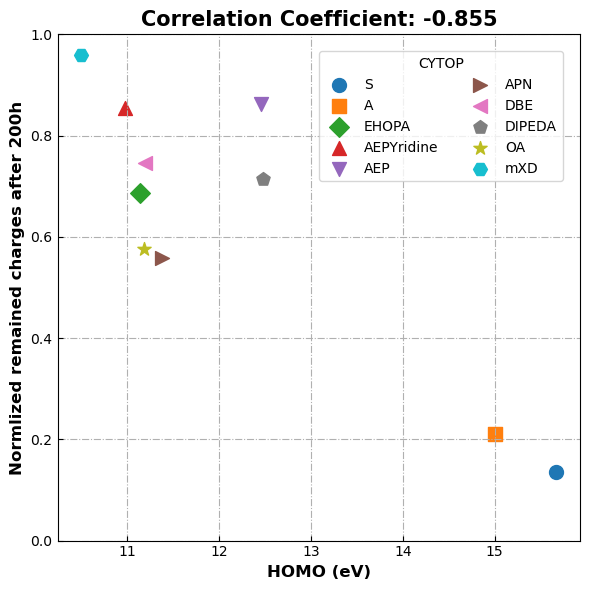

In [86]:
prop_charge(HOMO_mean,
              psp_Mao,
              title='CC_HOMO_psp',
              xlabel = 'HOMO (eV)',
              ylabel = 'Normlized remained charges after 200h' )


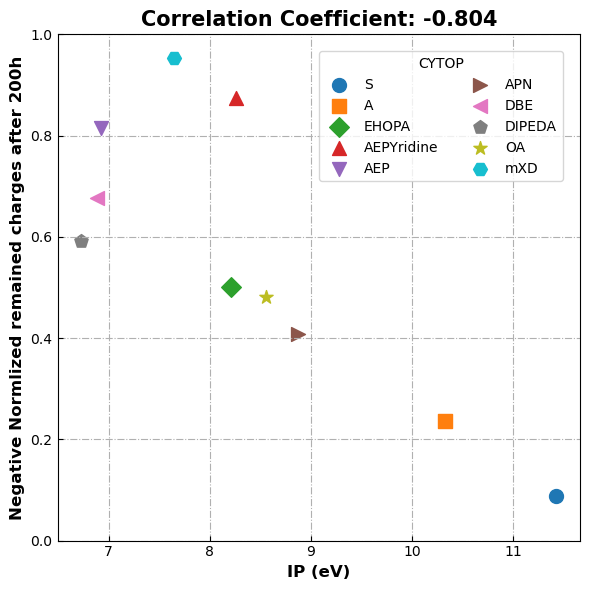

In [101]:
prop_charge(IP_mean,
              nsp_Mao,
              title='CC_IP_nsp',
              xlabel = 'IP (eV)',
              ylabel = 'Negative Normlized remained charges after 200h' )


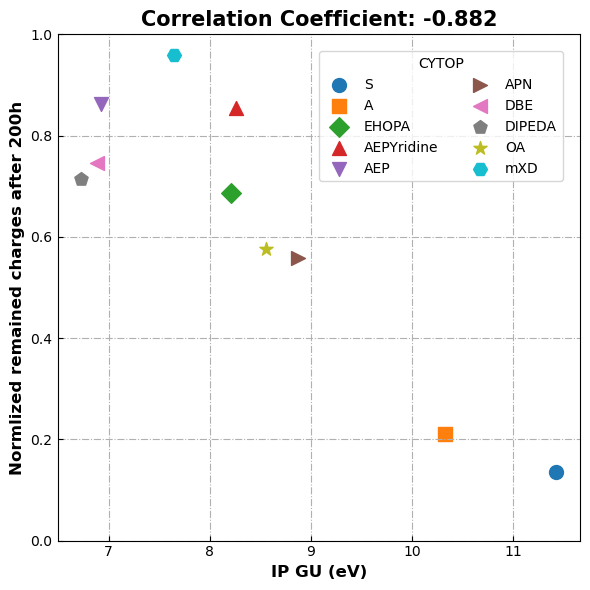

In [85]:
prop_charge(IP_mean,
              psp_Mao,
              title='CC_HOMO_psp',
              xlabel = 'IP GU (eV)',
              ylabel = 'Normlized remained charges after 200h' )


In [83]:
plt.rcdefaults()

def prop_com(x, y,title='None',xlabel = 'None',ylabel = 'None'):
    # 示例形状和标签
    shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
    labels = [f'{name_list[i]}' for i in range(len(x))]
    co = round(np.corrcoef(x, y)[0,1],3)
    # 创建散点图并指定不同的形状和标签
    plt.figure(figsize=(6, 6))
    plt.tick_params(axis='both', direction='in', which='both')
    plt.plot([min(min(x),min(y)),max(max(x),max(y))],[min(min(x),min(y)),max(max(x),max(y))],linestyle='--',color='black')
    plt.grid(linestyle='-.')
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
    # 添加图例
    if co < 0:
        plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), ncol=2, title="CYTOP")
    else:
        plt.legend(loc='lower right', bbox_to_anchor=(0.98, 0.02), ncol=2, title="CYTOP")
    # 设置图形标题和坐标轴标签
    plt.title(f"Correlation Coefficient: {co}",fontsize=15,fontweight='bold')
    plt.xlabel(xlabel,fontsize=12,fontweight='bold')
    plt.xticks(fontsize=10)  # X轴刻度字体大小
    plt.yticks(fontsize=10) 
    plt.ylabel(ylabel,fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.savefig(title,dpi=300)
    # 显示图形
    plt.show()

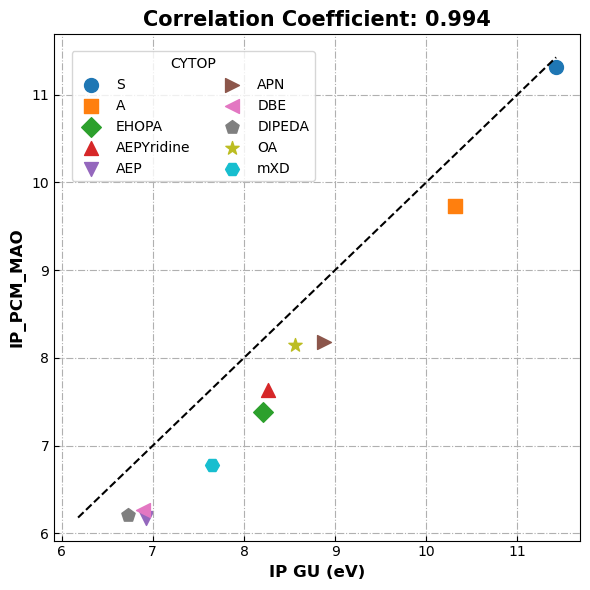

In [72]:
prop_com(IP_mean,
        ip_pcm_Mao,
        title='CC_IP(GU)_IP(MAO)',
        xlabel = 'IP GU (eV)',
        ylabel = 'IP_PCM_MAO(eV)' )


In [100]:
prop_com(IP_mean,
        HOMO_mean,
        title='CC_IP(GU)_HOMO',
        xlabel = 'IP GU (eV)',
        ylabel = 'HOMO (eV)' )


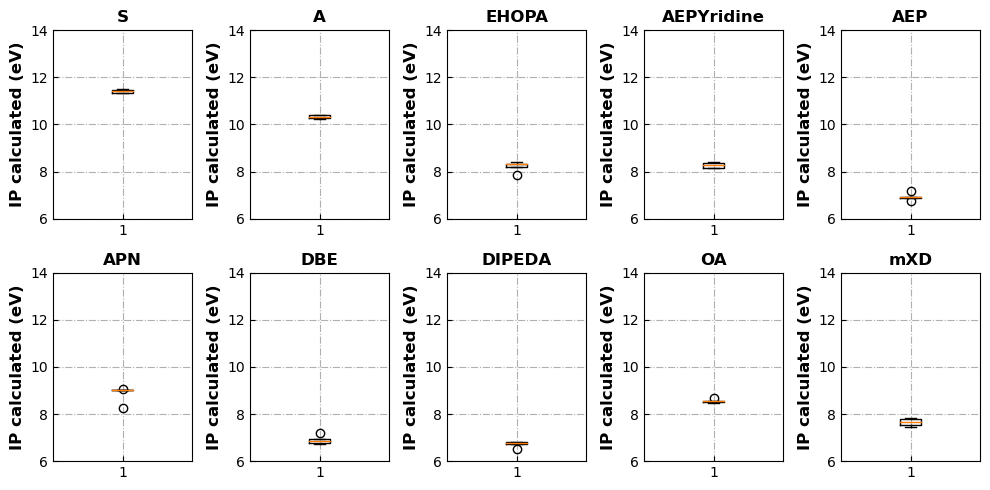

In [28]:

# 示例数据，替换为你的IP值数据
# 统计描述

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df_IP.iloc[:,i], vert=True)  # 绘制箱型图
    ax.set_ylabel('IP calculated (eV)',fontsize=12,fontweight='bold')
    ax.grid(linestyle='-.')
    ax.tick_params(axis='both', direction='in')  # 'both'表示x和y轴都调整
    ax.set_ylim(6,14)
    ax.set_title(f'{name_list[i]}',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.savefig('CYTOP_camb3lyp-631(dp)_IP_rdkit.png', dpi=300)

plt.show()


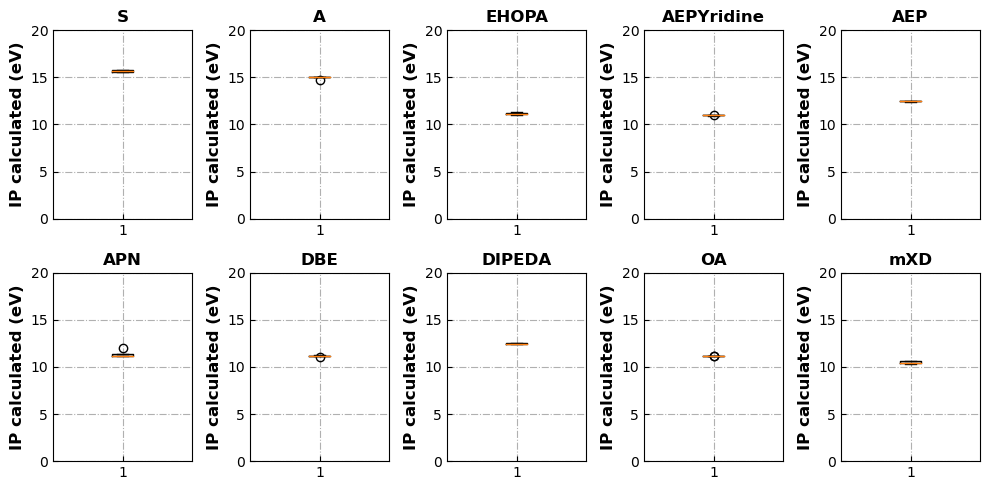

In [89]:
# 示例数据，替换为你的IP值数据
# 统计描述

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df_HOMO.iloc[:,i], vert=True)  # 绘制箱型图
    ax.set_ylabel('IP calculated (eV)',fontsize=12,fontweight='bold')
    ax.grid(linestyle='-.')
    ax.tick_params(axis='both', direction='in')  # 'both'表示x和y轴都调整
    ax.set_ylim(0,20)
    ax.set_title(f'{name_list[i]}',fontsize=12,fontweight='bold')
plt.tight_layout()
# plt.savefig('CYTOP_camb3lyp-631(dp)_IP_rdkit.png', dpi=300)

plt.show()

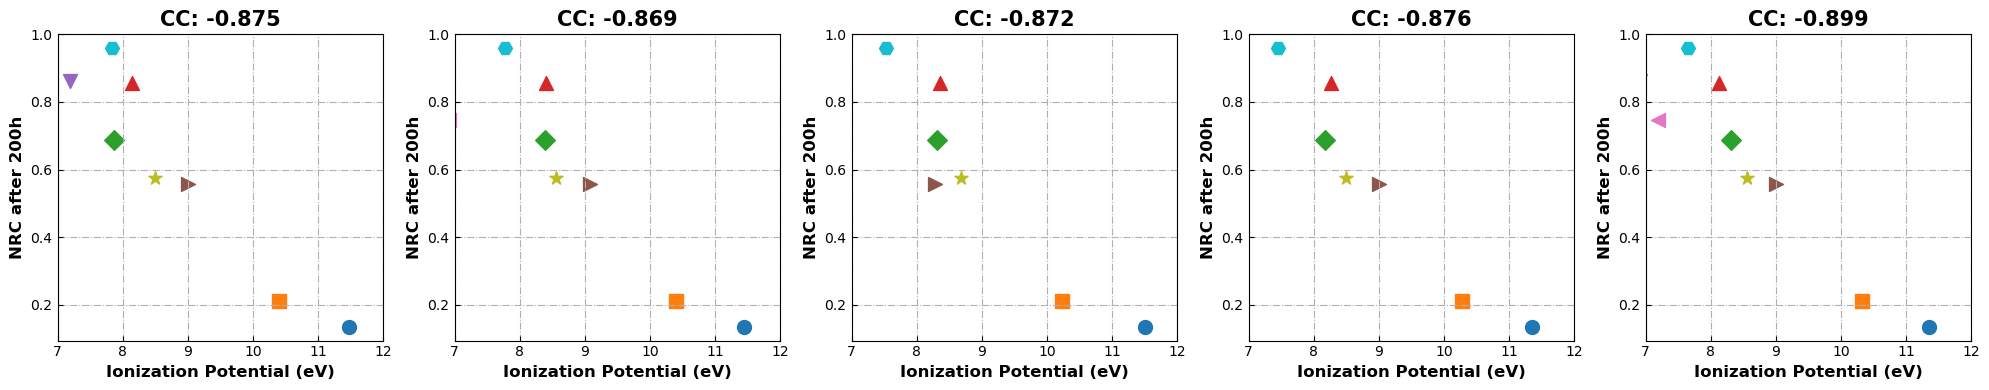

<Figure size 640x480 with 0 Axes>

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# 示例形状和标签
shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']

for j, ax in enumerate(axes.ravel()):
    if j < len(name_list):
        # 创建散点图并指定不同的形状和标签
        shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'H']
        labels = [f'{name_list[i]}' for i in range(10)]
        co = round(np.corrcoef(rdkit_df.iloc[j,:], psp)[0,1],3)
        # 创建散点图并指定不同的形状和标签
        ax.tick_params(axis='both', direction='in', which='both')
        ax.grid(linestyle='-.')
        for i in range(10):
            ax.scatter(rdkit_df.iloc[j,:][i], psp[i], marker=shapes[i], label=labels[i], s=100)  # 每个点的形状和标签
        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"CC: {co}",fontsize=15,fontweight='bold')
        ax.set_xlabel("Ionization Potential (eV)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(7,12)
        ax.set_ylabel("NRC after 200h",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('random.png',dpi=300)
plt.show()

# 调整子图之间的间距
plt.tight_layout()

In [32]:
# T1,T2,T_all = [],[],[]
# time_dict = {}
# for _ in name_list:
#     for i in range(10):
#         if os.path.exists(f"{_}{i}"):
#             t1 = utils.time_calculation(f"{_}{i}/{_}{i}_p1.log")
#             t2 = utils.time_calculation(f"{_}{i}/{_}{i}_0.log")
#             print(t1/t2)
#             T1.append(t1)
#             T2.append(t2)
#             T_all.append(t1+t2)

table = pd.DataFrame({'Name': IP_name, 'T':T_all})
table
# table.to_csv('CYTOP_m062x_6-311G(2d,p)_time.csv', index=False)
df = table.drop(['Name'], axis=1)
reshaped_data = df['T'].values.reshape(10, 5).T
new_df = pd.DataFrame(reshaped_data, columns=[f'{name_list[i]}' for i in range(10)])
new_df.to_csv('camb3lyp_IP_time.csv', index=False)
rdkit_T_df = new_df
rdkit_T_df

S          A      EHOPA  AEPYridine        AEP        APN  \
0  27.110000  25.350000  80.106667   51.711667  46.271667  61.338333   
1  23.351667  24.660000  78.045000   56.465000  44.761667  58.305000   
2  27.551667  24.276667  76.508333   55.971667  46.473333  53.051667   
3  25.728333  25.051667  72.151667   55.833333  45.035000  65.015000   
4  25.693333  25.000000  74.568333   52.258333  45.430000  58.948333   

         DBE     DIPEDA          OA        mXD  
0  60.561667  52.848333   69.038333  60.103333  
1  66.895000  63.956667  212.008333  58.328333  
2  66.343333  58.866667   61.801667  57.173333  
3  71.431667  55.770000   74.100000  67.555000  
4  81.055000  54.565000  211.921667  74.046667

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# 示例形状和标签

for j, ax in enumerate(axes.ravel()):
    time = round(rdkit_T_df.mean()[j],1)
    if j < len(name_list):
        sns.kdeplot(rdkit_T_df.iloc[:,j], fill=True,ax=ax)
        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"{name_list[j]}:{time} mins",fontsize=15,fontweight='bold')
        ax.set_xlabel("Time (mins)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(0,300)
        ax.set_ylabel("Density",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('Time_Density.png',dpi=300)
plt.show()

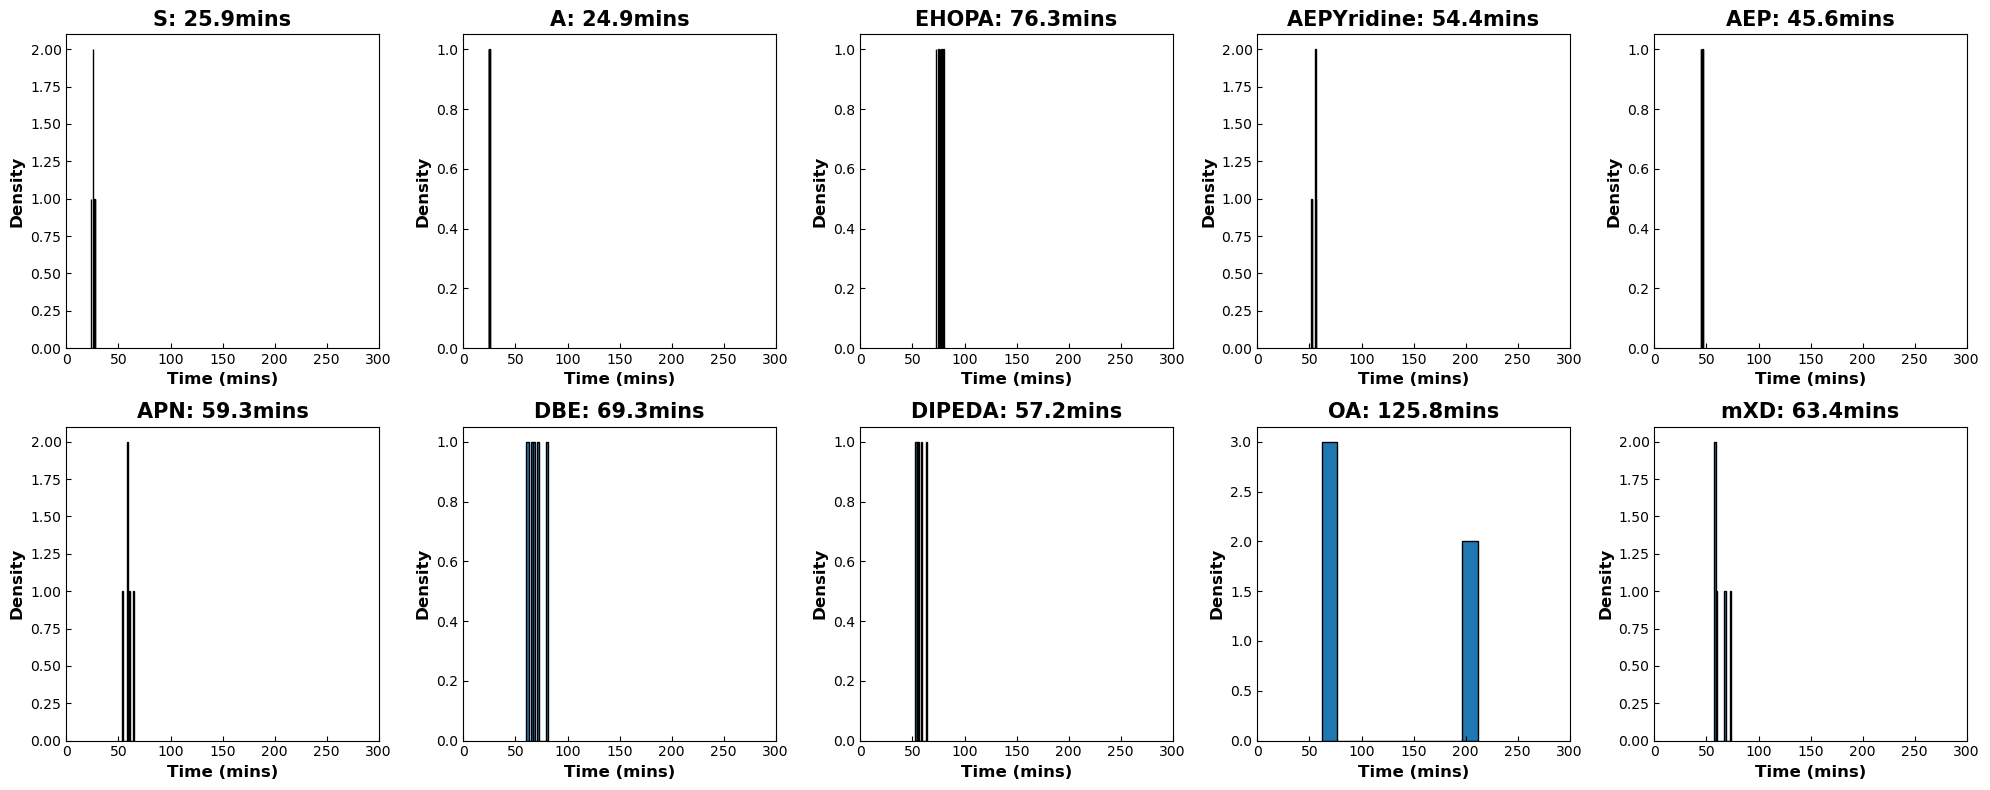

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# 示例形状和标签

for j, ax in enumerate(axes.ravel()):
    time = round(rdkit_T_df.mean()[j],1)
    if j < len(name_list):
        ax.hist(rdkit_T_df.iloc[:,j], bins=10, edgecolor='k')

        # 添加图例
        # plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), ncol=2, title="CYTOP")
        # plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), ncol=2, title="CYTOP")
        # 设置图形标题和坐标轴标签
        ax.set_title(f"{name_list[j]}: {time}mins",fontsize=15,fontweight='bold')
        ax.set_xlabel("Time (mins)",fontsize=12,fontweight='bold')     
        ax.tick_params(axis='both', direction='in', which='both')
        ax.set_xlim(0,300)
        ax.set_ylabel("Density",fontsize=12,fontweight='bold')
plt.tight_layout()
# 显示图形
plt.savefig('Time_hist.png',dpi=300)
plt.show()